In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = np.array([4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4])

/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


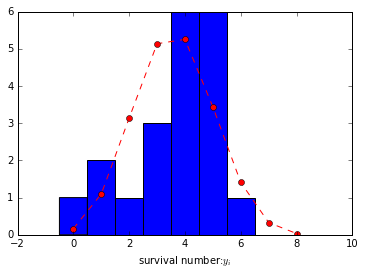

In [2]:
x = np.arange(-0.5,9.5,1.)
x_int = np.arange(0,9,1)
plt.hist(data,bins=x)
plt.plot(x_int,stats.binom.pmf(x_int,8,0.45)*20,'--o',color='r') #真の確率分布
plt.xlabel('survival number:$y_{i}$')
plt.show()

In [3]:
stats.binom.logpmf(x_int,8,0.45).sum()

-27.145918363812374

In [4]:
y = np.linspace(0.2,0.7,500)
log_likeliwoods = np.array([stats.binom.logpmf(data,8,p).sum() for p in y])

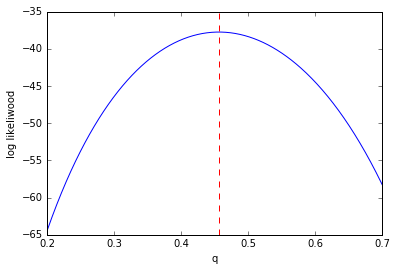

In [5]:
plt.plot(y,log_likeliwoods)
plt.axvline(y[np.argmax(log_likeliwoods)],c='r',linestyle='--')
plt.xlabel('q')
plt.ylabel('log likeliwood')
plt.show()

In [6]:
print('最大対数尤度のq:%f')%y[np.argmax(log_likeliwoods)]

最大対数尤度のq:0.456513


In [7]:
np.random.randint(2,size=100)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0])

In [8]:
def series_llf(prob):
    series = [[0,prob]]
    llf = stats.binom.logpmf(data,8,prob).sum()
    for i in range(100):
        random = np.random.randint(2)
        if random==1:
            cal = stats.binom.logpmf(data,8,prob+0.01).sum()
            if llf < cal:
                llf = cal
                prob += 0.01
        else:
            cal = stats.binom.logpmf(data,8,prob-0.01).sum()
            if llf < cal:
                llf = cal
                prob -= 0.01
        series.append([i+1,prob])
    
    return np.array(series)
init_3 = series_llf(0.3)
init_6 = series_llf(0.6)

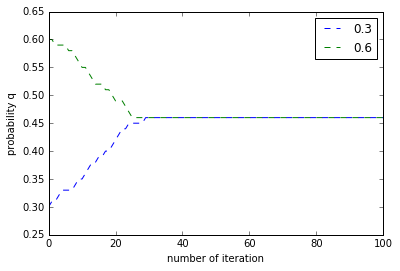

In [9]:
plt.plot(init_3[:,0],init_3[:,1],'--',label='0.3')
plt.plot(init_6[:,0],init_6[:,1],'--',label='0.6')
plt.legend(loc='upper right')
plt.xlabel('number of iteration')
plt.ylabel('probability q')
plt.show()

メトロポリス法：MCMCアルゴリズムの一つ

In [11]:
def series_llf_metoro(prob,size):
    llf = stats.binom.logpmf(data,8,prob).sum()
    series = [[0,prob,llf]]
    for i in range(size):
        random = np.random.randint(2)
        if random==1:
            cal = stats.binom.logpmf(data,8,prob+0.01).sum()
            if llf < cal:
                llf = cal
                prob += 0.01
            elif np.random.rand() < np.exp(cal-llf):
                llf = cal
                prob += 0.01
        else:
            cal = stats.binom.logpmf(data,8,prob-0.01).sum()
            if llf < cal:
                llf = cal
                prob -= 0.01
            elif np.random.rand() < np.exp(cal-llf):
                llf = cal
                prob -= 0.01           
        series.append([i+1,prob,llf])
    
    return np.array(series)

init_3_100 = series_llf_metoro(0.3,100)
init_3_1000 = series_llf_metoro(0.3,1000)
init_3_10000 = series_llf_metoro(0.3,10000)

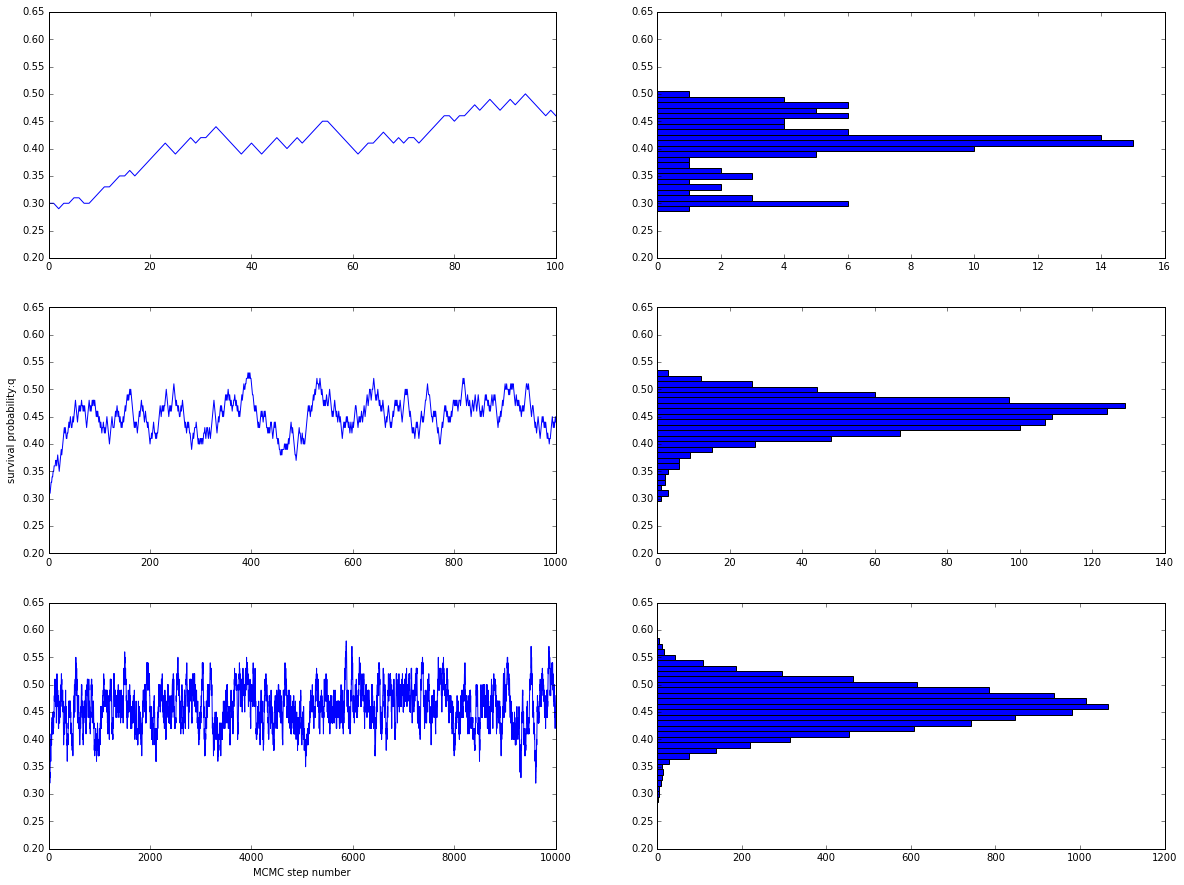

In [12]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3,2,1)
ax12 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax22 = fig.add_subplot(3,2,4)
ax3 = fig.add_subplot(3,2,5)
ax32 = fig.add_subplot(3,2,6)

ax1.plot(init_3_100[:,0],init_3_100[:,1],label='N=100')
ax1.set_ylim((0.2,0.65))
ax12.hist(init_3_100[:,1],bins=np.arange(0.245,0.655,0.01),orientation='horizontal')
ax2.plot(init_3_1000[:,0],init_3_1000[:,1],label='N=1000')
ax2.set_ylim((0.2,0.65))
ax2.set(ylabel='survival probability:q')
ax22.hist(init_3_1000[:,1],bins=np.arange(0.245,0.655,0.01),orientation='horizontal')
ax3.plot(init_3_10000[:,0],init_3_10000[:,1],label='N=10000')
ax3.set_ylim((0.2,0.65))
ax3.set(xlabel='MCMC step number')
ax32.hist(init_3_10000[:,1],bins=np.arange(0.245,0.655,0.01),orientation='horizontal')

plt.show()

In [45]:
y = np.arange(0.25,0.66,0.01)
log_likeliwoods = np.array([stats.binom.logpmf(data,8,q).sum() for q in y])
likeliwoods = np.exp(log_likeliwoods)
P_q_Y = likeliwoods / likeliwoods.sum()

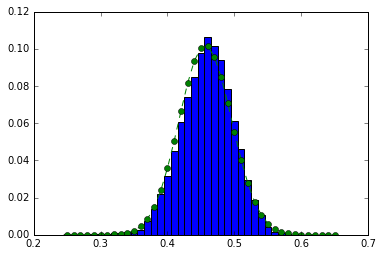

In [46]:
plt.hist(init_3_10000[:,1],bins=np.arange(0.245,0.655,0.01),weights=np.ones(len(init_3_10000[:,1]))*0.0001)
plt.plot(y,P_q_Y,'--o')
plt.show()